In [40]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Visit the Mars Temperature data site and scrape data 
df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')

In [4]:
#Assemble the scraped data into a Pandas DataFrame
mars_weather_df = df[0]
mars_weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [5]:
#Examine the data types of all the DataFrame columns
mars_weather_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [12]:
#convert terrestrial_date column to datetime datatype
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'], format='%Y-%m-%d')

In [13]:
#Reexamine the data types of all the DataFrame columns
mars_weather_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [18]:
#How many months exist on Mars?
mars_weather_df.groupby("month").count()

,id,terrestrial_date,sol,ls,min_temp,pressure
month,,,,,,
1,174,174,174,174,174,174
2,178,178,178,178,178,178
3,192,192,192,192,192,192
4,194,194,194,194,194,194
5,149,149,149,149,149,149
6,147,147,147,147,147,147
7,142,142,142,142,142,142
8,141,141,141,141,141,141
9,134,134,134,134,134,134


In [26]:
#How many Martian (and not Earth) days worth of data exist in the scraped dataset?
mars_weather_df.groupby("sol").count()

,id,terrestrial_date,ls,month,min_temp,pressure
sol,,,,,,
10,1,1,1,1,1,1
11,1,1,1,1,1,1
12,1,1,1,1,1,1
13,1,1,1,1,1,1
14,1,1,1,1,1,1
...,...,...,...,...,...,...
1973,1,1,1,1,1,1
1974,1,1,1,1,1,1
1975,1,1,1,1,1,1


In [76]:
#What are the coldest and the warmest months on Mars (at the location of Curiosity)
temp_df = mars_weather_df.groupby("month").mean()[['min_temp']].sort_values(by=['min_temp'], ascending = False)
temp_df

,min_temp
month,
8,-68.382979
9,-69.171642
10,-71.982143
11,-71.985507
7,-72.281690
12,-74.451807
6,-75.299320
1,-77.160920
5,-79.308725


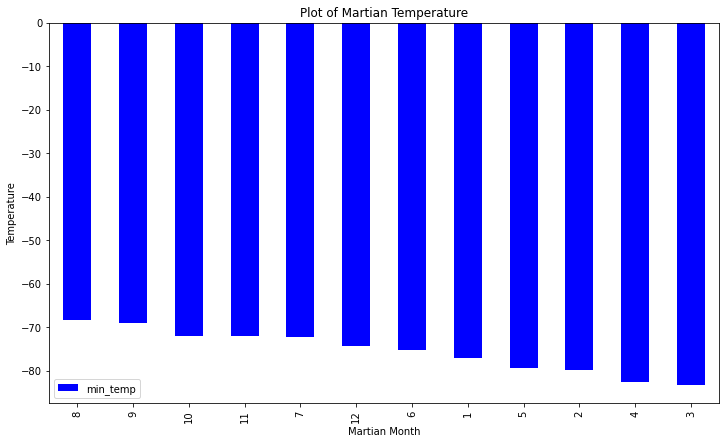

In [77]:
# Create a bar chart based off of the group series from before
temp_df_bar = temp_df.plot(kind='bar',figsize =(12,7), color = "b", title ="Plot of Martian Temperature")

# Set the xlabel and ylabel using class methods
temp_df_bar.set_xlabel("Martian Month")
temp_df_bar.set_ylabel("Temperature")

plt.show()

In [79]:
#Which months have the lowest and the highest atmospheric pressure on Mars?
pressure_df = mars_weather_df.groupby("month").mean()[['pressure']].sort_values(by=['pressure'])
pressure_df

,pressure
month,
6,745.054422
5,748.557047
7,795.105634
4,806.329897
12,842.156627
11,857.014493
1,862.488506
8,873.829787
3,877.322917


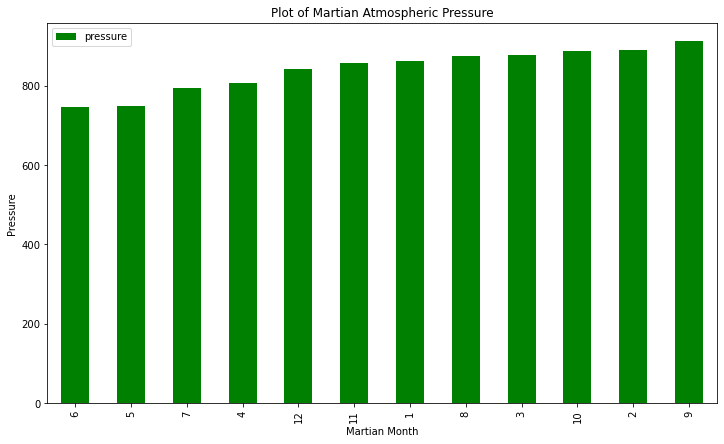

In [80]:
# Create a bar chart based off of the group series from before
pressure_df_bar = pressure_df.plot(kind='bar',figsize =(12,7), color = "g", title ="Plot of Martian Atmospheric Pressure")

# Set the xlabel and ylabel using class methods
pressure_df_bar.set_xlabel("Martian Month")
pressure_df_bar.set_ylabel("Pressure")

plt.show()